In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [459]:
pd.options.display.max_seq_items = 2000

In [460]:
df = pd.read_csv('train_data.csv')
df.set_index(['name'], inplace = True)
df.drop(['email_address'], axis = 1, inplace = True)

In [461]:
#Replace NaNs
fin_features = ['salary', 'deferral_payments', 'total_payments', \
                'loan_advances', 'bonus', 'restricted_stock_deferred', \
                'deferred_income', 'total_stock_value', 'expenses', \
                'exercised_stock_options', 'other', 'long_term_incentive', \
                'restricted_stock', 'director_fees']

email_features = ['to_messages', 'from_poi_to_this_person', \
                  'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'\
                  , 'from_poi_frac','to_poi_frac']

In [523]:
def replace_Nans(data):
    for i in fin_features:
        data[i] = data[i].fillna(0)
    for i in email_features:
        data[i] = data[i].fillna(data[i].median())
    return data

def MinMax(data):
    for i in data.columns:
        if data[i].dtype =='float64':
            MM = MinMaxScaler()
            data[i] = MM.fit_transform(data[i].values.reshape(-1,1))
    return data

LAY KENNETH L is a poi so not removing (ie. loan advance, total payments, dicector_fees, exercised_stock_options, other, restricted_stock, total_stock_value)

In [508]:
df.drop(['THE TRAVEL AGENCY IN THE PARK'], axis =0, inplace = True)

KeyError: "['THE TRAVEL AGENCY IN THE PARK'] not found in axis"

In [524]:
target = df['poi']
data = df.drop(['poi'], axis = 1)

data['from_poi_frac'] = data['from_poi_to_this_person']/data['to_messages']
data['to_poi_frac'] = data['from_this_person_to_poi']/data['from_messages']

data = replace_Nans(data)
data = MinMax(data)
data.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,from_poi_frac,to_poi_frac
name,,,,,,,,,,,,,,,,,,,,,
RICE KENNETH D,0.21875,0.03342,0.000000,0.0,0.576277,0.205234,0.000418,0.079545,0.009732,0.0,...,0.016877,0.186182,0.927036,0.378522,0.190497,0.056189,0.004877,0.459506,0.288138,0.222222
SKILLING JEFFREY K,0.70000,0.03342,1.000000,0.0,0.560434,0.128238,0.006687,0.166667,0.072993,0.0,...,0.002135,0.463610,0.927036,1.000000,0.450829,0.236549,0.083843,0.531751,0.150638,0.277778
SHELBY REX,0.02500,0.03342,0.998811,0.0,0.047292,0.100034,0.001881,0.024621,0.034063,0.0,...,0.151869,0.058883,0.927036,0.190634,0.019669,0.011132,0.019350,0.051628,0.358725,0.358974
KOPPER MICHAEL J,0.10000,0.03342,1.000000,0.0,0.000000,0.516403,0.002299,0.053030,0.017032,0.0,...,0.087599,0.066729,0.927036,0.201848,0.131934,0.068314,0.025614,0.020937,0.157299,0.070751
CALGER CHRISTOPHER F,0.15625,0.03342,0.925094,0.0,0.000000,0.156573,0.009195,0.376894,0.060827,0.0,...,0.000047,0.008537,0.927036,0.216142,0.483094,0.168367,0.015829,0.003461,0.475570,0.173611


In [558]:
X_train, X_valid, Y_train, Y_valid = train_test_split(data, target, test_size = 0.3, random_state=42)

acc: 0.7647058823529411
precision: 0.25
recall: 0.16666666666666666


<BarContainer object of 21 artists>

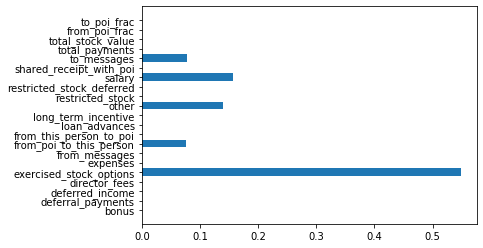

In [559]:
DT = DecisionTreeClassifier(max_depth = 5, random_state=42)
DT.fit(X_train, Y_train)
DT_pred = DT.predict(X_valid)

acc = accuracy_score(Y_valid, DT_pred)
precision = precision_score(Y_valid, DT_pred)
recall = recall_score(Y_valid, DT_pred)
print(  f'acc: {acc}\nprecision: {precision}\nrecall: {recall}')
plt.barh(X_train.columns, DT.feature_importances_)

In [560]:
def feature_performance(features):
    X_train, X_valid, Y_train, Y_valid = train_test_split(data[features], target, test_size = 0.3, random_state=42)
    DT = DecisionTreeClassifier(random_state=5)
    DT.fit(X_train, Y_train)
    DT_pred = DT.predict(X_valid)

    acc = accuracy_score(Y_valid, DT_pred)
    precision = precision_score(Y_valid, DT_pred)
    recall = recall_score(Y_valid, DT_pred)
    f1 = f1_score(Y_valid, DT_pred)
    print(  f'acc: {acc}\nprecision: {precision}\nrecall: {recall}\nf1 :{f1}')

In [561]:
DT_features = ['exercised_stock_options', 'expenses', 'bonus','from_poi_to_this_person','other','to_poi_frac']

In [562]:
feature_performance(DT_features)

acc: 0.7647058823529411
precision: 0.25
recall: 0.16666666666666666
f1 :0.2


acc: 0.8235294117647058
precision: 0.5
recall: 0.16666666666666666
f1 :0.25


C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<BarContainer object of 21 artists>

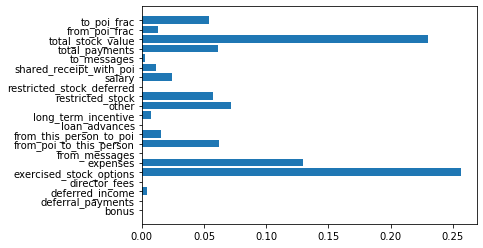

In [563]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
RF_pred = RF.predict(X_valid)

acc = accuracy_score(Y_valid, RF_pred)
precision = precision_score(Y_valid, RF_pred)
recall = recall_score(Y_valid, RF_pred)
f1 = f1_score(Y_valid, RF_pred)
print(  f'acc: {acc}\nprecision: {precision}\nrecall: {recall}\nf1 :{f1}')
plt.barh(X_train.columns, RF.feature_importances_)

In [550]:
RF_feature1 = ['bonus', 'deferral_payments',
       'exercised_stock_options', 'expenses', 'from_messages',
       'from_poi_to_this_person', 'from_this_person_to_poi',
       'long_term_incentive', 'other', 'restricted_stock', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value', 'from_poi_frac',
       'to_poi_frac']

In [551]:
feature_performance(RF_feature1)

acc: 0.7352941176470589
precision: 0.2
recall: 0.16666666666666666
f1 :0.1818181818181818


DT_feature looks slightly better

In [552]:
RF_feature2 = ['total_stock_value', 'exercised_stock_options', 'other', 'expenses',
       'restricted_stock', 'salary', 'to_messages', 'from_poi_frac', 'to_poi_frac',
       'deferred_income', 'from_poi_to_this_person']

In [553]:
feature_performance(RF_feature2)

acc: 0.7352941176470589
precision: 0.2
recall: 0.16666666666666666
f1 :0.1818181818181818


In [554]:
SK = SelectKBest(f_classif, k = 'all')
SK.fit(X_train, Y_train)
SK_importance = pd.Series(SK.scores_, index= X_train.columns)

In [567]:
SK_features = SK_importance.nlargest(7).index

In [568]:
SK_features

Index(['exercised_stock_options', 'total_stock_value', 'other', 'salary',
       'restricted_stock', 'total_payments'],
      dtype='object')

In [569]:
feature_performance(SK_features)

acc: 0.7352941176470589
precision: 0.2
recall: 0.16666666666666666
f1 :0.1818181818181818


In [542]:
features = ['exercised_stock_options','total_stock_value','other','expenses','deferred_income','bonus']
features2 = ['exercised_stock_options','total_stock_value','other','expenses']

In [543]:
feature_performance(features)

acc: 0.7647058823529411
precision: 0.3333333333333333
recall: 0.3333333333333333
f1 :0.3333333333333333


In [544]:
feature_performance(features2)

acc: 0.7352941176470589
precision: 0.2
recall: 0.16666666666666666
f1 :0.1818181818181818


In [539]:
X_train, X_valid, Y_train, Y_valid = train_test_split(data[SK_features], target, test_size = 0.3, random_state=42)

In [533]:
KNN = KNeighborsClassifier()
RF = RandomForestClassifier(random_state = 42)
DT = DecisionTreeClassifier(random_state = 42)
NB = GaussianNB()
Ada = AdaBoostClassifier()

models = [KNN, RF, DT, NB, Ada]

In [534]:
def model_performance(model): 
    model.fit(X_train, Y_train)
    pred = model.predict(X_valid)
    print(str(model))
    print(f'acc: {accuracy_score(Y_valid, pred)}')
    print(f'pre: {precision_score(Y_valid, pred)}')
    print(f'rec: {recall_score(Y_valid, pred)}')
    print(f'f1s: {f1_score(Y_valid, pred)}')

In [535]:
for model in models:
    model_performance(model)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
acc: 0.8235294117647058
pre: 0.0
rec: 0.0
f1s: 0.0
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
acc: 0.8235294117647058
pre: 0.5
rec: 0.16666666666666666
f1s: 0.25
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_spli

C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [439]:
recall_scorer = make_scorer(recall_score)
auc_scorer = make_scorer(roc_auc_score)

In [440]:
def auc_score(model):
    model.fit(X_train, Y_train)
    pred = model.predict(X_valid)
    print(f'cross_valid_score = {roc_auc_score(Y_valid, pred)}')

In [441]:
for model in models:
    auc_score(model)

cross_valid_score = 0.5
cross_valid_score = 0.5654761904761905
cross_valid_score = 0.6130952380952381
cross_valid_score = 0.5476190476190477
cross_valid_score = 0.5476190476190477


# Decision Tree and AdaBoost looks good

In [442]:
def tunning(model, params):
    Grid = GridSearchCV(model, params, scoring= auc_scorer, cv = 3)
    model = Grid.fit(X_train, Y_train)
    model = model.best_estimator_
    return model

In [443]:
DT = DecisionTreeClassifier(random_state = 42)
Ada = AdaBoostClassifier()
models = [DT, Ada]

In [444]:
DT_para = {'criterion': ['gini', 'entropy'],
           'max_depth': [None, 1, 2, 5, 10],
           'min_samples_split': [2, 3, 4, 5],
           'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]}
Ada_para = {'n_estimators': [5,10,20,50,100,200],
            'learning_rate': [0.1, 0.2, 0.4, 0.5, 1],
            'algorithm': ['SAMME', 'SAMME.R']}
param_list = [DT_para, Ada_para]

In [445]:
DT = tunning(DT, DT_para)

C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [446]:
DT

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [447]:
Ada = tunning(Ada, Ada_para)

C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [448]:
Ada

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=5, random_state=None)

In [449]:
DT_pred = DT.predict(X_valid)
print('accuracies = ', accuracy_score(Y_valid, DT_pred))
print('precision = ', precision_score(Y_valid, DT_pred))
print('recall = ', recall_score(Y_valid, DT_pred))
print('----------------------------')

accuracies =  0.7941176470588235
precision =  0.4
recall =  0.3333333333333333
----------------------------


In [450]:
Ada_pred = Ada.predict(X_valid)
print('accuracies = ', accuracy_score(Y_valid, Ada_pred))
print('precision = ', precision_score(Y_valid, Ada_pred))
print('recall = ', recall_score(Y_valid, Ada_pred))
print('----------------------------')

accuracies =  0.8235294117647058
precision =  0.5
recall =  0.16666666666666666
----------------------------


In [454]:
cross_val_score(DT, X_valid, Y_valid, cv = 3).mean()

0.6792929292929294

In [455]:
cross_val_score(Ada, X_valid, Y_valid, cv=3).mean()

0.73989898989899

In [456]:
KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', leaf_size=1, algorithm= 'auto', p= 1)
KNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

In [457]:
KNN_pred = KNN.predict(X_valid)
print('accuracies = ', accuracy_score(Y_valid, KNN_pred))
print('precision = ', precision_score(Y_valid, KNN_pred))
print('recall = ', recall_score(Y_valid, KNN_pred))
print('----------------------------')

accuracies =  0.8529411764705882
precision =  1.0
recall =  0.16666666666666666
----------------------------


In [341]:
cross_val_score(KNN, X_valid, Y_valid, cv=3)

array([0.83333333, 0.83333333, 0.9       ])

In [338]:
final = pd.read_csv('test_features.csv')
final = final.set_index(['name'])

final['from_poi_frac'] = final['from_poi_to_this_person']/final['to_messages']
final['to_poi_frac'] = final['from_this_person_to_poi']/final['from_messages']

final = replace_Nans(final)
final = MinMax(final)

test_X = final[DT_features]


In [339]:
test_X.shape

(33, 6)

In [340]:
test_Y = KNN.predict_proba(test_X)
final['poi'] = test_Y[:,0]
output = final['poi']
output = pd.DataFrame(output)
output.to_csv('prediction.csv')